# __Microsoft COCO dataset overview__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In this _Jupyter Notebook_, I will present prepared for my project unprocessed data with target labels for captions and visual attention. Moreover, I will do basic Exploratory Data Analysis (EDA) and draw some conclusions about what kind of additional data preprocessing processes will be needed additionaly to currently assumed ones.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image, ImageDraw

from scripts.data_utils import data_loader as dl
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = (10, 10)

COCO_VALIDATION_PATHS = dl.CoCoTrainingDatasetPaths(
    images="../data/validation/val2017",
    captions_json="../data/validation/captions_val2017.json",
    segmentation_json="../data/validation/instances_val2017.json"
)

In [2]:
validation_dataset = dl.CoCoTrainingDataset(data_paths=COCO_VALIDATION_PATHS)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


In [3]:
image, captions, segmentations = validation_dataset[2]

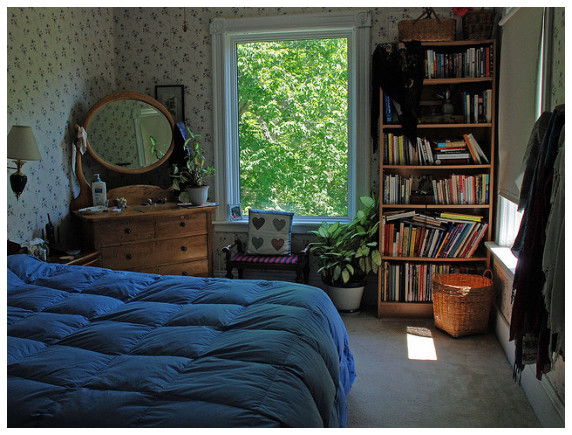

In [4]:
plt.axis("off")
plt.imshow(image)

In [5]:
captions

['Bedroom scene with a bookcase, blue comforter and window.',
 'A bedroom with a bookshelf full of books.',
 'This room has a bed with blue sheets and a large bookcase',
 'A bed and a mirror in a small room.',
 'a bed room with a neatly made bed a window and a book shelf']

In [6]:
print(segmentations.keys())

dict_keys(['bed', 'potted plant', 'book', 'chair'])


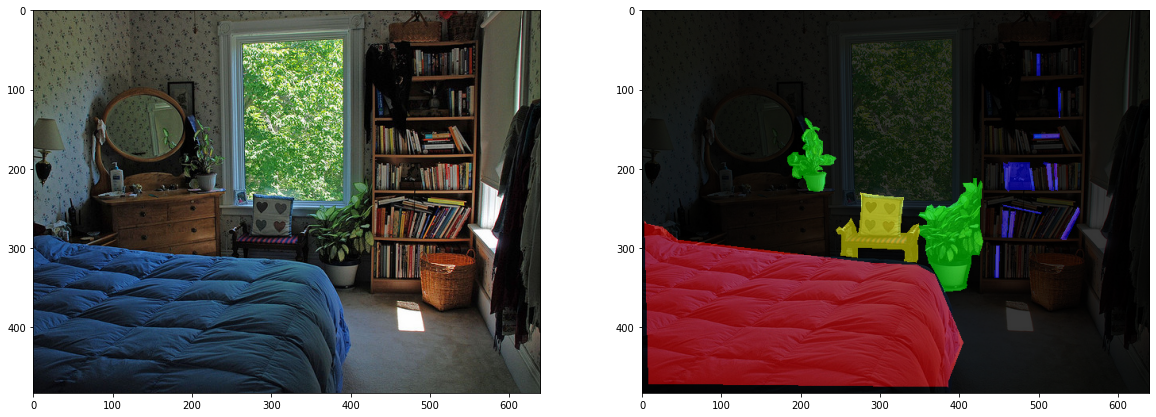

In [7]:
masked_image = image.convert("RGBA").copy()

img_mask = Image.new("RGBA", masked_image.size, (0, 0, 0, 200))
draw_context = ImageDraw.Draw(img_mask)

# HAVE TO FIND A WAY TO AUTOMATE COLOR ASSIGNING FOR OBJECT CATEGORY
colors = [(255, 0, 0, 130), (0, 255, 0, 130), (0, 0, 255, 130), (255, 255, 0, 130), (0, 255, 255, 130), (255, 0, 255, 130), (255, 255, 255, 130)]
color_iter = iter(colors)
color = next(color_iter)
for object_category, masks in segmentations.items():
    for mask in masks:
        mask = [(mask[i], mask[i+1]) for i in range(0, len(mask)-1, 2)]
        
        draw_context.polygon(mask, fill=color)
    
    try:
        color = next(color_iter)
    except StopIteration:
        color_iter = iter(colors)
        color = next(color_iter)
    
masked_image = Image.alpha_composite(masked_image, img_mask).convert("RGB")

fig, axis = plt.subplots(1, 2, figsize=(20, 10))

axis[0].imshow(image)
axis[1].imshow(masked_image)